In [1]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from glob import glob
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map
folder_data = "/Odyssey/public/data_challenge_ssh_ose/data/maps/NeurOST_SSH-SST_allsat-alg/"
file_obs = "NeurOST_SSH_allsat-al_2019.nc" 

#list_of_maps = sorted(glob('/Odyssey/public/data_challenge_ssh_ose/data/maps/NeurOST_SSH_allsat-alg/NeurOST_SSH_allsat-alg_*_20240115.nc'))
list_of_maps = sorted(glob(f'{folder_data}/*.nc'))
#list_of_maps = "/Odyssey/private/t22picar/data/glorys_15m/glorys_15.81m_2019-01-01-2020-01-01.nc"
maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
#maps = xr.open_dataset(folder_data+file_obs)

start_date = "2019-01-01"
end_date = "2019-12-31"
maps = maps.sel(time=slice(start_date, end_date))

In [2]:
maps

<xarray.Dataset> Size: 47GB
Dimensions:                 (latitude: 1500, longitude: 3600, time: 365)
Coordinates:
  * longitude               (longitude) float64 29kB 0.1 0.2 0.3 ... 359.9 360.0
  * latitude                (latitude) float64 12kB -70.0 -69.9 ... 79.8 79.9
  * time                    (time) datetime64[ns] 3kB 2019-01-01 ... 2019-12-31
    Lambert_Azimuthal_Grid  int32 4B -2147483647
Data variables:
    sla                     (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    adt                     (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    ugosa                   (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    vgosa                   (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    ugos                    (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    vgos                    (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>

In [3]:
maps.coords['longitude'] = (maps.coords['longitude'] + 180) % 360 - 180
maps = maps.sortby(maps.longitude)

maps = maps.rename({"latitude": "lat"})
maps = maps.rename({"longitude": "lon"})

#lat = maps.lat.values
#lon = maps.lon.values

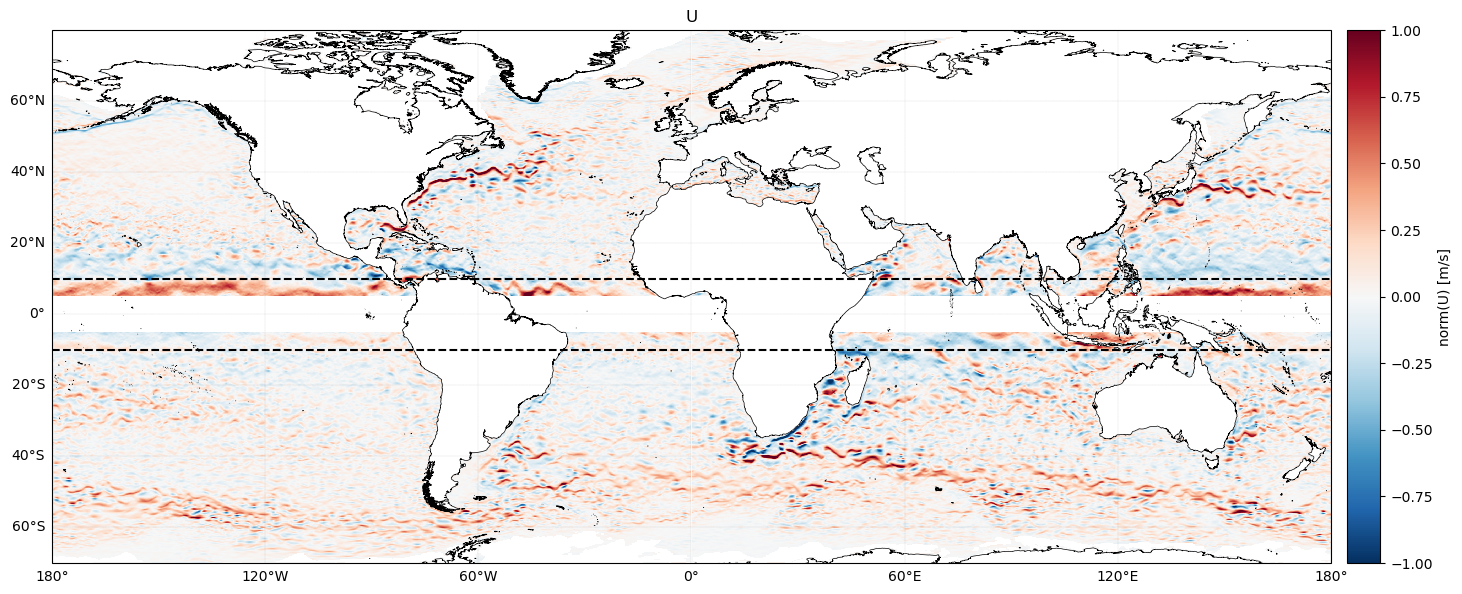

In [4]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map

plot_uv_map(maps.ugos[:,:,0],maps.lon.values,maps.lat.values,title="U")

In [7]:
folder_data_4th = "/Odyssey/private/t22picar/data/glorys_15m/"
file_glorys_4th = "glorys_multivar_15m_2010-2018.nc"

maps_glo_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)

#maps = maps.rename({"adt": "zos"})

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=maps_glo_4th.lat.min(), stop=maps_glo_4th.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=maps_glo_4th.lon.min(), stop=maps_glo_4th.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

new sizes: [680, 1440]


In [8]:
maps = maps.drop_vars("sla").drop_vars("adt").drop_vars("vgosa").drop_vars("ugosa")

In [9]:
# Interpolation new grid
maps_4th = maps.interp({"lat":maps_glo_4th.lat, "lon":maps_glo_4th.lon}, method="linear")

#maps_4th = regrid_da(new_sizes,maps)

In [10]:
maps_4th = maps_4th.transpose('time','lat','lon')

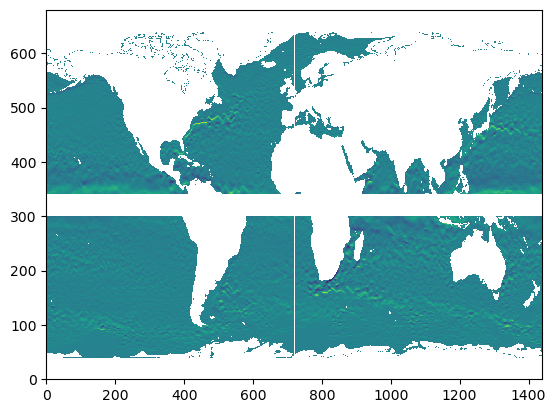

In [11]:
plt.pcolormesh(maps_4th.ugos[0])

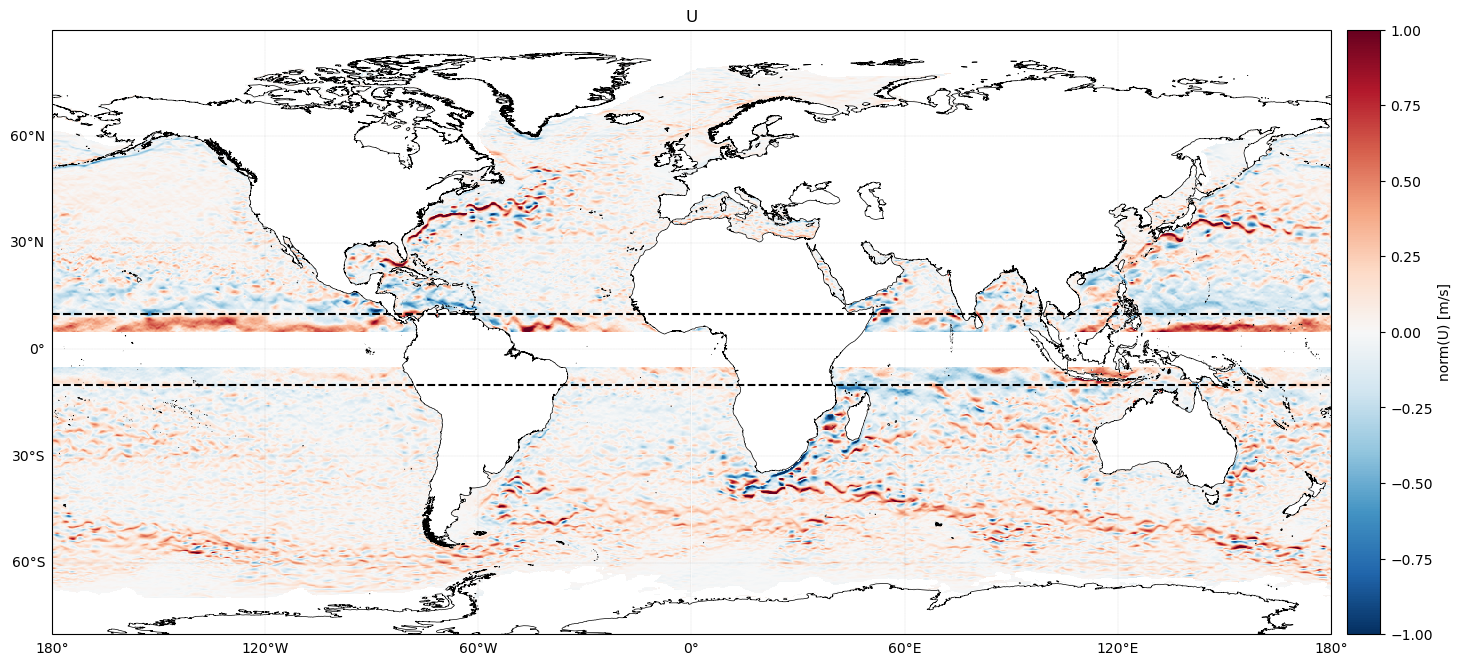

In [12]:
plot_uv_map(maps_4th.ugos[0],maps_4th.lon.values,maps_4th.lat.values,title="U")

In [13]:
folder_data = "/Odyssey/private/t22picar/data/uv/"
file_obs = "NeurOST_SST-SSH_uv_allsat-al_2019.nc" 

# save data 
save_file=file_obs[:-3]+"_4th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_4th.to_netcdf(folder_data+save_file)


In [4]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

folder_data = "/Odyssey/private/t22picar/data/ssh_L4/"
file_glorys = "SSH_L4_CMEMS_2019_4th.nc" # Actually not glorys 

maps_sst = xr.open_dataset(folder_data+file_glorys)
lat_simu = maps_sst.lat.values
lon_simu = maps_sst.lon.values

folder_data_4th = "/Odyssey/private/t22picar/data/glorys_2020_15m/"
file_glorys_4th = "glorys_15.81m_2020-01-20-2021-04-20_4th.nc"
maps_glo = xr.open_dataset(folder_data_4th+file_glorys_4th)